## Task-D: Collinear features and their effect on linear models

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("C:\\Users\\Akashraj D S\\Downloads\\8_LinearModels-20210710T061429Z-001\\8_LinearModels\\task_d.csv")

In [8]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [9]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Finding the Correlation between the features 

In [10]:
correlation = data.corr()

In [11]:
correlation

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


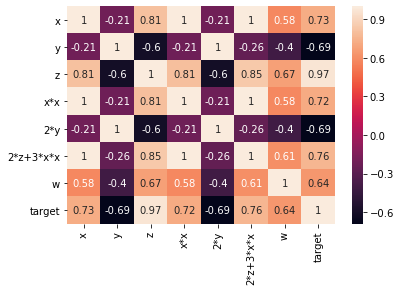

In [12]:
sns.heatmap(correlation,annot=True)

In [13]:
#Y and 2Y are highly correlated
#X and X*X are highly correlated
#2*Z+3*X*X is highly correlated with X and X*X


# Logistic Regression

## Finding the best model for given data

In [14]:
import numpy 
alpha = numpy.logspace(0.001,1,5)

In [15]:
alpha

array([ 1.00230524,  1.78135304,  3.16592046,  5.62665128, 10.        ])

In [16]:
params={'alpha':alpha}
clf=SGDClassifier(loss='log')
cross_val = GridSearchCV(estimator=clf,param_grid = params, cv=5)
cross_val.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1.00230524,  1.78135304,  3.16592046,  5.62665128, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [17]:
pd.DataFrame(cross_val.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002401,0.001854,0.000456,0.000456,1.00231,{'alpha': 1.0023052380778996},1.00,1.0,1.0,1.00,1.00,1.00,0.000000,1
1,0.001001,0.000002,0.000256,0.000392,1.78135,{'alpha': 1.7813530430086404},1.00,1.0,1.0,0.95,0.95,0.98,0.024495,2
2,0.000601,0.000491,0.000401,0.000491,3.16592,{'alpha': 3.1659204634322378},0.90,1.0,1.0,0.90,0.95,0.95,0.044721,3
3,0.000601,0.000491,0.000400,0.000490,5.62665,{'alpha': 5.626651280675067},0.95,0.9,0.9,0.85,0.90,0.90,0.031623,4
4,0.000738,0.000388,0.000198,0.000397,10,{'alpha': 10.0},0.50,0.5,0.6,0.50,0.50,0.52,0.040000,5


In [18]:
best_model_lr = cross_val.best_estimator_

## Getting the weights with original data

In [19]:
best_model_lr.fit(X,Y)

SGDClassifier(alpha=1.0023052380778996, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
y_pred_lr = best_model_lr.predict(X)

In [21]:
from sklearn.metrics import accuracy_score
best_model_accuracy = accuracy_score(Y,y_pred_lr)
best_model_accuracy

0.99

In [22]:
weights_without_noise = best_model_lr.coef_

## Modifying original data

In [23]:
X_dash = data.drop(['target'], axis=1)
X_dash = X_dash.add(0.01)
X_dash = X_dash.values

In [24]:
best_model_lr.fit(X_dash,Y)

SGDClassifier(alpha=1.0023052380778996, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
y_pred_lr_with_noise = best_model_lr.predict(X_dash)

In [26]:
best_model_accuracy_edited = accuracy_score(Y,y_pred_lr_with_noise)
best_model_accuracy_edited

1.0

In [27]:
weights_with_noise = best_model_lr.coef_

## Checking deviations in metric and weights

In [28]:
difference_accuracy = best_model_accuracy - best_model_accuracy_edited
difference_accuracy

-0.010000000000000009

In [29]:
values = abs(weights_without_noise - weights_with_noise)

In [30]:
values

array([[0.00385742, 0.00116328, 0.00032523, 0.00447727, 0.00116328,
        0.00407881, 0.00054663]])

In [31]:
keys = data.columns[0:len(data.columns)-1]

In [32]:
keys

Index(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w'], dtype='object')

In [33]:
d={}
for i in range(0,len(values[0])):
    d[keys[i]]=values[0][i]
d

{'x': 0.0038574172414173324,
 'y': 0.0011632779234296842,
 'z': 0.0003252314872647655,
 'x*x': 0.004477268693702935,
 '2*y': 0.0011632779234296842,
 '2*z+3*x*x': 0.004078808976586579,
 'w': 0.0005466275841054802}

In [34]:
sorted_by_feature = sorted(d.items(), key = lambda kv: kv[1], reverse=True)

In [35]:
sorted_by_feature

[('x*x', 0.004477268693702935),
 ('2*z+3*x*x', 0.004078808976586579),
 ('x', 0.0038574172414173324),
 ('y', 0.0011632779234296842),
 ('2*y', 0.0011632779234296842),
 ('w', 0.0005466275841054802),
 ('z', 0.0003252314872647655)]

# SVM

## Finding the best model for given data

In [36]:
import numpy 
alpha_svm = numpy.logspace(0.001,1,5)

In [37]:
alpha

array([ 1.00230524,  1.78135304,  3.16592046,  5.62665128, 10.        ])

In [38]:
params={'alpha':alpha}
clf=SGDClassifier(loss='hinge')
cross_val_svm = GridSearchCV(estimator=clf,param_grid = params, cv=5)
cross_val_svm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1.00230524,  1.78135304,  3.16592046,  5.62665128, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

In [39]:
pd.DataFrame(cross_val_svm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001690,0.000588,0.000938,0.000539,1.00231,{'alpha': 1.0023052380778996},1.00,1.00,1.0,1.00,1.00,1.00,0.000000,1
1,0.001191,0.000394,0.000402,0.000493,1.78135,{'alpha': 1.7813530430086404},1.00,1.00,1.0,1.00,1.00,1.00,0.000000,1
2,0.001648,0.000447,0.000056,0.000113,3.16592,{'alpha': 3.1659204634322378},0.95,1.00,1.0,1.00,1.00,0.99,0.020000,3
3,0.001040,0.000077,0.000000,0.000000,5.62665,{'alpha': 5.626651280675067},0.90,0.90,0.9,0.90,0.85,0.89,0.020000,4
4,0.000600,0.000490,0.000210,0.000420,10,{'alpha': 10.0},0.65,0.65,0.8,0.55,0.50,0.63,0.102956,5


In [40]:
best_model_svm = cross_val_svm.best_estimator_

## Getting the weights with original data

In [41]:
best_model_svm.fit(X,Y)

SGDClassifier(alpha=1.0023052380778996, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
y_pred_svm = best_model_svm.predict(X)

In [43]:
from sklearn.metrics import accuracy_score
best_model_accuracy_svm = accuracy_score(Y,y_pred_svm)
best_model_accuracy_svm

1.0

In [44]:
weights_without_noise_svm = best_model_svm.coef_

## Modifying original data

In [45]:
X_dash = data.drop(['target'], axis=1)
X_dash = X_dash.add(0.01)
X_dash_svm = X_dash.values

In [46]:
best_model_svm.fit(X_dash_svm,Y)

SGDClassifier(alpha=1.0023052380778996, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
y_pred_svm_with_noise = best_model_svm.predict(X_dash_svm)

In [48]:
best_model_accuracy_svm_edited = accuracy_score(Y,y_pred_svm_with_noise)
best_model_accuracy_svm_edited

1.0

In [49]:
weights_with_noise_svm = best_model_svm.coef_

## Checking deviations in metric and weights

In [50]:
difference_accuracy_svm = best_model_accuracy_svm - best_model_accuracy_svm_edited
difference_accuracy_svm

0.0

In [51]:
values_svm = abs(weights_without_noise_svm - weights_with_noise_svm)

In [52]:
d_svm={}
for i in range(0,len(values_svm[0])):
    d_svm[keys[i]]=values_svm[0][i]
d_svm

{'x': 0.00085927662336438,
 'y': 0.0010573313722122002,
 'z': 0.00019098094162989243,
 'x*x': 0.0013565964789609142,
 '2*y': 0.0010573313722122002,
 '2*z+3*x*x': 0.0012425583672647234,
 'w': 0.001882516541764967}

In [53]:
sorted_by_feature_svm = sorted(d_svm.items(), key = lambda kv: kv[1], reverse=True)
sorted_by_feature_svm

[('w', 0.001882516541764967),
 ('x*x', 0.0013565964789609142),
 ('2*z+3*x*x', 0.0012425583672647234),
 ('y', 0.0010573313722122002),
 ('2*y', 0.0010573313722122002),
 ('x', 0.00085927662336438),
 ('z', 0.00019098094162989243)]

## Observations

If the features are said to be non-collinear, there should not be any differences between them. In both LR and SVM, it shows difference between weights. So they are collinear